In [1]:
from sklearn.datasets import fetch_openml
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

In [2]:
mnist = fetch_openml('mnist_784', data_home='~/datasets/mnist')

In [3]:
%matplotlib inline

In [4]:
import matplotlib
import matplotlib.pyplot as plt

In [21]:
X, y = mnist['data'], mnist['target']
X = np.asarray(X, dtype=int)
print(X.shape)
print(X)

(70000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
print(mnist['target'])

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


7
type <class 'numpy.ndarray'>


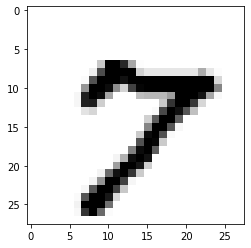

In [26]:
img_one = 69000
print(y[img_one])
digit_one = X[img_one]
print("type", type(digit_one))
digit_one_show = digit_one.reshape(28,28)
plt.imshow(digit_one_show, cmap=matplotlib.cm.binary, interpolation="nearest")

9


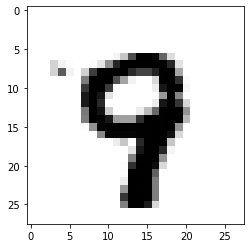

In [8]:
img_two = 6999
print(y[img_two])
digit_two = X[img_two]
digit_two_show = digit_two.reshape(28,28)
plt.imshow(digit_two_show, cmap=matplotlib.cm.binary, interpolation="nearest")

9


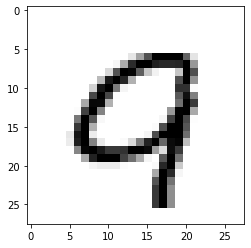

In [9]:
img_three = 3000
print(y[img_three])
digit_three = X[img_three]
digit_three_show = digit_three.reshape(28,28)
plt.imshow(digit_three_show, cmap=matplotlib.cm.binary, interpolation="nearest")

5


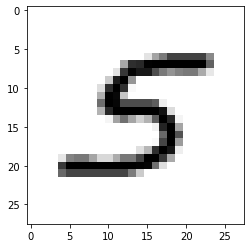

In [10]:
img_four = 2999
print(y[img_four])
digit_four = X[img_four]
digit_four_show = digit_four.reshape(28,28)
plt.imshow(digit_four_show, cmap=matplotlib.cm.binary, interpolation="nearest")

7


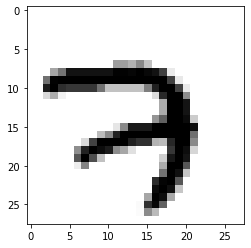

In [11]:
img_five = 5000
print(y[img_five])
digit_five = X[img_five]
digit_five_show = digit_five.reshape(28,28)
plt.imshow(digit_five_show, cmap=matplotlib.cm.binary, interpolation="nearest")

In [12]:
x_train, x_test = X[:6000], X[6000:7000]
y_train, y_test = y[:6000], y[6000:7000]

In [13]:
shuffle_index = np.random.permutation(6000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [14]:
#Digit two as test case
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_digit = (y_train == 9)
y_test_digit = (y_test == 9)

In [15]:
mnist_clf = svm.SVC()

In [16]:
mnist_clf.fit(x_train, y_train_digit)

SVC()

In [17]:
y_pred = mnist_clf.predict([digit_one, digit_two, digit_three, digit_four, digit_five])

In [18]:
y_pred

array([False,  True,  True, False, False])

In [19]:
a = cross_val_score(mnist_clf, x_train, y_train_digit, cv=3, scoring="accuracy")

In [20]:
a.mean() #Accuracy of the prediction

0.9815